In [2]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm 

# 형태소 분석 
from kiwipiepy import Kiwi
from itertools import chain
from collections import Counter
import ast 

# 시각화 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns



### 한국어 리뷰 데이터 가져오기

In [9]:
comment_path1 = '../csv/total_review.csv'
comment_path2 = '../csv/trans_extractdf.csv'

df1 = pd.read_csv(comment_path1)
df2 = pd.read_csv(comment_path2)
airbnb_review_data = pd.concat([df1, df2])
airbnb_review_data.reset_index(drop=True, inplace = True)
airbnb_review_data

c:\Users\User\anaconda3\envs\yun_env\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating,reviewer_id,date,comments,kr_comments
0,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1002142.0,2011-09-21,Couldnt get any betterThe apartment itself is ...,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다. 게다가 ...
1,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1031940.0,2011-10-14,The apartment is bigger than it looks in the p...,아파트는 사진에서 보이는 것보다 더 넓습니다. 커플에게 적합합니다. 깨끗하고 잘 관...
2,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1097040.0,2011-11-21,The appartement is perfect for a couple It is ...,아파트는 커플에게 적합합니다. 조금 작지만 정말 완벽한 가구가 그것을 보완합니다. ...
3,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1183674.0,2011-11-30,We had a terrific stay at Yoshimi and Mareks l...,요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다. 모든 것이 새로 정...
4,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1538004.0,2012-01-09,We loved our stay at the Oshiage Holiday Apart...,우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다. 아파트는 매우 좋았고 매...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188389,25871823,2.0429e+07,Mizuki,t,Shinjuku Ku,10.0,3.0,9.0,"$42,143.00",2.0,2018-08-06,2023-06-25,4.98,145757288.0,2018-09-23,非常棒的体验地理位置很方便房东也很好客适合出游的一家人,훌륭한 경험입니다. 위치가 매우 편리합니다. 호스트도 매우 친절합니다. 가족 여행에...
188390,27378720,2.0634e+08,Rintaro,t,Toshima Ku,2.0,1.0,1.0,"$21,000.00",1.0,2018-08-31,2023-06-16,4.87,92871039.0,2019-01-10,最初から最後まで丁寧な対応をしていただき今回の最後の旅行の宿に決めて大正解でしたお部屋は二人...,처음부터 끝까지 정중한 대응을 해 주셔서 이번 마지막 여행의 숙소로 결정해 대정해였...
188391,34581295,2.29062e+08,Kenta,f,Shibuya Ku,12.0,2.0,6.0,"$74,286.00",1.0,2019-05-19,2023-06-01,4.77,38501607.0,2022-05-31,とても快適なお部屋でしたありがとうございました,매우 편안한 방이었습니다. 고마워요.
188392,34843191,3.93144e+07,Masahiro,f,Bunkyo Ku,2.0,1.0,1.0,"$8,429.00",2.0,2019-06-10,2023-06-25,4.57,316941852.0,2019-12-23,,NaN


In [10]:
airbnb_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188394 entries, 0 to 188393
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   listing_id              188394 non-null  object 
 1   host_id                 188389 non-null  object 
 2   host_name               188386 non-null  object 
 3   host_is_superhost       171061 non-null  object 
 4   neighbourhood_cleansed  188386 non-null  object 
 5   accommodates            188386 non-null  float64
 6   bedrooms                153126 non-null  float64
 7   beds                    180731 non-null  float64
 8   price                   188386 non-null  object 
 9   minimum_nights          188386 non-null  float64
 10  first_review            188386 non-null  object 
 11  last_review             188386 non-null  object 
 12  review_scores_rating    188386 non-null  float64
 13  reviewer_id             188386 non-null  float64
 14  date                

#### 중복, Null 데이터 제거 

In [12]:
# NULL 데이터 제거 
print(airbnb_review_data['kr_comments'].isnull().sum())
airbnb_review_data = airbnb_review_data.dropna(subset=['kr_comments'])
airbnb_review_data.reset_index(drop=True, inplace=True)
airbnb_review_data['kr_comments'].isnull().sum()

3446


0

In [13]:
#  'listing_id','reviewer_id', 'comments', 'date'], keep='first' 기준 중복데이터 제거 
airbnb_review_data = airbnb_review_data.drop_duplicates(subset=['listing_id','reviewer_id', 'comments', 'date'], keep='first').reset_index(drop=True)


In [13]:
# airbnb_review_data.to_csv('total_translate_review.csv')
airbnb_review_data = pd.read_csv('total_translate_review.csv', index_col = 0)

In [18]:
comment_data = airbnb_review_data['kr_comments']
comment_data

0         더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다. 게다가 ...
1         아파트는 사진에서 보이는 것보다 더 넓습니다. 커플에게 적합합니다. 깨끗하고 잘 관...
2         아파트는 커플에게 적합합니다. 조금 작지만 정말 완벽한 가구가 그것을 보완합니다. ...
3         요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다. 모든 것이 새로 정...
4         우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다. 아파트는 매우 좋았고 매...
                                ...                        
184941                                         바로 밖에서 좋은 음식
184942    집은 역에서 멀지 않고 근처에 레스토랑이 많습니다. 체크인과 체크아웃이 매우 편리합...
184943    훌륭한 경험입니다. 위치가 매우 편리합니다. 호스트도 매우 친절합니다. 가족 여행에...
184944    처음부터 끝까지 정중한 대응을 해 주셔서 이번 마지막 여행의 숙소로 결정해 대정해였...
184945                                 매우 편안한 방이었습니다. 고마워요.
Name: kr_comments, Length: 184946, dtype: object

### 코멘트 데이터 전처리

In [19]:
def preprocessed(text):
    # 한국어 텍스트만 남기고 나머지는 공백으로 대체
    text = re.sub(r'[^가-힣 ]', ' ', text)
    # 작은따옴표(') 제거
    text = text.replace("'", '')
    # 연속된 공백을 하나의 공백으로 대체하고 양쪽 공백 제거
    text = ' '.join(text.split())

    return text

In [20]:
filtered_comment = list(map(preprocessed, comment_data))
filtered_comment[:10]

['더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다 게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼마켓과 일부 편의점 및 기차역이 정말 가깝습니다 처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다',
 '아파트는 사진에서 보이는 것보다 더 넓습니다 커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다 서양인으로서 우리는 다다미 바닥에서 이상한 냄새가 난다는 것을 알았지만 나중에 모든 다다미 방에서 같은 냄새가 난다는 것을 알게 되었습니다 지하철역에서 도보로 약 분 거리에 위치 이 노선에서는 패스가 유효하지 않으며 슈퍼마켓 상점과 레스토랑에서 도보 거리에 있습니다 전반적으로 좋은 경험을 했으며 도쿄를 여행하는 모든 사람에게 추천합니다',
 '아파트는 커플에게 적합합니다 조금 작지만 정말 완벽한 가구가 그것을 보완합니다 일상 생활에 필요한 모든 것이 제공됩니다 우리는 또한 동네를 많이 즐겼으며 주요 도시와 가까운 매력적인 장소입니다 머무르게 해주셔서 감사합니다 다시 방문하겠습니다',
 '요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다 모든 것이 새로 정리되고 정돈되어 있었으며 우리에게 필요한 모든 편안함과 편리함이 갖춰져 있었습니다 그들이 우리에게 남겨준 생존 키트에는 집과 동네에 대한 정보가 가득했고 긴급 전화번호까지 포함되어 있었습니다 다른 임대 숙소에서는 볼 수 없었던 기타 세부 사항 이 아파트는 미국 표준에 비해 규모가 작은 일본식이지만 모든 것이 잘 설계되어 우리 인 가족이 꽤 편안했습니다 동네가 특별히 그림처럼 아름답지는 않았지만 확실히 편리하고 흥미로웠습니다 훌륭한 가치와 훌륭한 숙박',
 '우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다 아파트는 매우 좋았고 매우 편안하고 흠집이 없었습니다 스미다강과 아사쿠사가 가깝고 새로운 도쿄 스카이트리 바로 아래에 있는 위치가 정말 마음에 들었습니다 동네는 매우 조용하고 평화롭지만

In [21]:
len(comment_data)

184946

### 문장 형태소 분석 - Kiwipiepy
Kiwipiepy는 한국어 형태소 분석기인 Kiwi(Korean Intelligent Word Identifier)의 Python 모듈

In [3]:
# !pip install --upgrade pip
!pip install kiwipiepy

                                              0.0/1.0 MB ? eta -:--:--
     -----------                              0.3/1.0 MB 9.6 MB/s eta 0:00:01
     ----------------------                   0.6/1.0 MB 6.2 MB/s eta 0:00:01
     -----------------------------------      0.9/1.0 MB 6.6 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 6.0 MB/s eta 0:00:00
                                              0.0/30.8 MB ? eta -:--:--
                                              0.2/30.8 MB 5.3 MB/s eta 0:00:06
                                              0.4/30.8 MB 5.7 MB/s eta 0:00:06
                                              0.6/30.8 MB 5.1 MB/s eta 0:00:06
     -                                        1.0/30.8 MB 6.0 MB/s eta 0:00:05
     -                                        1.2/30.8 MB 6.1 MB/s eta 0:00:05
     --                                       1.5/30.8 MB 5.8 MB/s eta 0:00:06
     --                                       1.8/30.8 MB 5.4 MB/s eta 

     ----------------------------             21.6/30.8 MB 5.7 MB/s eta 0:00:02
     ----------------------------             21.9/30.8 MB 5.7 MB/s eta 0:00:02
     ----------------------------             22.2/30.8 MB 5.6 MB/s eta 0:00:02
     -----------------------------            22.4/30.8 MB 5.7 MB/s eta 0:00:02
     -----------------------------            22.6/30.8 MB 5.6 MB/s eta 0:00:02
     -----------------------------            22.9/30.8 MB 5.6 MB/s eta 0:00:02
     ------------------------------           23.2/30.8 MB 5.7 MB/s eta 0:00:02
     ------------------------------           23.5/30.8 MB 5.6 MB/s eta 0:00:02
     ------------------------------           23.7/30.8 MB 5.7 MB/s eta 0:00:02
     -------------------------------          24.0/30.8 MB 5.6 MB/s eta 0:00:02
     -------------------------------          24.2/30.8 MB 5.7 MB/s eta 0:00:02
     -------------------------------          24.4/30.8 MB 5.6 MB/s eta 0:00:02
     --------------------------------   

In [22]:

kiwi = Kiwi(model_type='sbg', typos='basic', typo_cost_threshold = 2.5)

### 텍스트 띄어쓰기 교정

In [23]:
space_comments = kiwi.space(comment_data, reset_whitespace=True)
space_comments = list(filtered_comment)
space_comments[:5]

['더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다 게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼마켓과 일부 편의점 및 기차역이 정말 가깝습니다 처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다',
 '아파트는 사진에서 보이는 것보다 더 넓습니다 커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다 서양인으로서 우리는 다다미 바닥에서 이상한 냄새가 난다는 것을 알았지만 나중에 모든 다다미 방에서 같은 냄새가 난다는 것을 알게 되었습니다 지하철역에서 도보로 약 분 거리에 위치 이 노선에서는 패스가 유효하지 않으며 슈퍼마켓 상점과 레스토랑에서 도보 거리에 있습니다 전반적으로 좋은 경험을 했으며 도쿄를 여행하는 모든 사람에게 추천합니다',
 '아파트는 커플에게 적합합니다 조금 작지만 정말 완벽한 가구가 그것을 보완합니다 일상 생활에 필요한 모든 것이 제공됩니다 우리는 또한 동네를 많이 즐겼으며 주요 도시와 가까운 매력적인 장소입니다 머무르게 해주셔서 감사합니다 다시 방문하겠습니다',
 '요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다 모든 것이 새로 정리되고 정돈되어 있었으며 우리에게 필요한 모든 편안함과 편리함이 갖춰져 있었습니다 그들이 우리에게 남겨준 생존 키트에는 집과 동네에 대한 정보가 가득했고 긴급 전화번호까지 포함되어 있었습니다 다른 임대 숙소에서는 볼 수 없었던 기타 세부 사항 이 아파트는 미국 표준에 비해 규모가 작은 일본식이지만 모든 것이 잘 설계되어 우리 인 가족이 꽤 편안했습니다 동네가 특별히 그림처럼 아름답지는 않았지만 확실히 편리하고 흥미로웠습니다 훌륭한 가치와 훌륭한 숙박',
 '우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다 아파트는 매우 좋았고 매우 편안하고 흠집이 없었습니다 스미다강과 아사쿠사가 가깝고 새로운 도쿄 스카이트리 바로 아래에 있는 위치가 정말 마음에 들었습니다 동네는 매우 조용하고 평화롭지만

#### 여러 문장으로 구성된 텍스트 분리

In [24]:
split_result = kiwi.split_into_sents(space_comments, return_tokens = True)
split_result = list(split_result)
split_result[:3]

[[Sentence(text='더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다', start=0, end=40, tokens=[Token(form='더', tag='MAG', start=0, len=1), Token(form='하', tag='XSV', start=1, len=1), Token(form='ᆯ', tag='ETM', start=1, len=1), Token(form='나위', tag='NNB', start=3, len=2), Token(form='없이', tag='MAG', start=6, len=2), Token(form='아파트', tag='NNG', start=9, len=3), Token(form='자체', tag='NNG', start=13, len=2), Token(form='가', tag='JKS', start=15, len=1), Token(form='훌륭', tag='XR', start=17, len=2), Token(form='하', tag='XSA', start=19, len=1), Token(form='고', tag='EC', start=20, len=1), Token(form='필요', tag='NNG', start=22, len=2), Token(form='하', tag='XSA', start=24, len=1), Token(form='ᆫ', tag='ETM', start=24, len=1), Token(form='모든', tag='MM', start=26, len=2), Token(form='것', tag='NNB', start=29, len=1), Token(form='이', tag='JKS', start=30, len=1), Token(form='갖추', tag='VV', start=32, len=2), Token(form='어', tag='EC', start=33, len=1), Token(form='지', tag='VX', start=34, len=1), Token(form='어', ta

#### text 와 token을 분리해서 데이터프레임 생성

In [25]:
text = []
token = []
for comment in split_result:
    text.extend([sentence[0] for sentence in comment])
    token.extend([sentence[3] for sentence in comment])


sentence_df = pd.DataFrame(
    {
        'text' : text,
        'token' : token
    }
)

# sentence_df.to_csv('kiwi_sentence.csv')
sentence_df.head()

,text,token
0,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다,"[(더, MAG, 0, 1), (하, XSV, 1, 1), (ᆯ, ETM, 1, 1..."
1,게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼...,"[(게다가, MAG, 41, 3), (동네, NNG, 45, 2), (자체, NNG..."
2,처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다,"[(처음, NNG, 114, 2), (부터, JX, 116, 2), (집, NNG,..."
3,아파트는 사진에서 보이는 것보다 더 넓습니다,"[(아파트, NNG, 0, 3), (는, JX, 3, 1), (사진, NNG, 5,..."
4,커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다,"[(커플, NNG, 25, 2), (에게, JKB, 27, 2), (적합, NNG,..."


#### 명사, 동사, 어근을 분리합니다

In [26]:
nouns = []
verbs = []
neg_verbs = []
radixs = []

for morphs in sentence_df['token']:
    nouns.append([(noun[0], noun[1]) for noun in morphs if noun[1] in ['NNG', 'NNP']])
    neg_verbs.append([morphs for noun in morphs if noun[1] in ['VCN']])
    verbs.append([(verb[0]+'다', verb[1]) for verb in morphs if verb[1] in ['VA', 'VV', 'VX']])
    radixs.append([(verb[0], verb[1]) for verb in morphs if verb[1] in ['XR']])

sentence_df['verbs'] = verbs
sentence_df['nouns'] = nouns
sentence_df['radixs'] = radixs

sentence_df.head()


,text,token,verbs,nouns,radixs
0,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다,"[(더, MAG, 0, 1), (하, XSV, 1, 1), (ᆯ, ETM, 1, 1...","[(갖추다, VV), (지다, VX), (있다, VX)]","[(아파트, NNG), (자체, NNG), (필요, NNG)]","[(훌륭, XR)]"
1,게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼...,"[(게다가, MAG, 41, 3), (동네, NNG, 45, 2), (자체, NNG...",[],"[(동네, NNG), (자체, NNG), (친절, NNG), (점, NNG), (가...",[]
2,처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다,"[(처음, NNG, 114, 2), (부터, JX, 116, 2), (집, NNG,...","[(느끼다, VV), (지다, VX), (구하다, VV), (있다, VA)]","[(처음, NNG), (집, NNG), (물건, NNG), (포장, NNG)]",[]
3,아파트는 사진에서 보이는 것보다 더 넓습니다,"[(아파트, NNG, 0, 3), (는, JX, 3, 1), (사진, NNG, 5,...","[(보이다, VV), (넓다, VA)]","[(아파트, NNG), (사진, NNG)]",[]
4,커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다,"[(커플, NNG, 25, 2), (에게, JKB, 27, 2), (적합, NNG,...","[(있다, VX), (있다, VA)]","[(커플, NNG), (적합, NNG), (관리, NNG), (안전, NNG), (...","[(깨끗, XR), (유용, XR)]"


In [40]:
sentence_df.to_csv('review_token.csv')
# sentence_df = pd.read_csv('review_token.csv', index_col = 0)

In [61]:
def split_word(df, row):
    if type(df[row][0]) == str:
        target =  df[row].apply(ast.literal_eval)
    else:
        target = df[row]
        
    word_list = [word[0] for words in target for word in words]

    return word_list

def count_words(word_list):
    word_counts = Counter(word_list)
    # sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    return word_counts

verbs_list = split_word(sentence_df, 'verbs')
nouns_list = split_word(sentence_df, 'nouns')
radixs_list = split_word(sentence_df, 'radixs')

verbs_counts = count_words(verbs_list)
nouns_counts = count_words(nouns_list)
radixs_counts = count_words(radixs_list)



In [31]:
print(list(nouns_counts)[:10])
print(list(verbs_counts)[:10])
print(list(radixs_list)[:10])


['아파트', '자체', '필요', '동네', '친절', '점', '가족', '생활', '에너지', '슈퍼마켓']
['갖추다', '지다', '있다', '느끼다', '구하다', '보이다', '넓다', '나다', '알다', '같다']
['훌륭', '깨끗', '유용', '훌륭', '훌륭', '조용', '훌륭', '깨끗', '충분', '탁월']


### 문장 시각화 

In [63]:

palettes = ['spring', 'summer', 'seismic','PuBu']

def generate_word_cloud(data, font_path, title, color=None):
    wordcloud = WordCloud(width=800, height=400,
                          max_words=200,
                          scale=2,
                          random_state=42,
                          background_color='white',
                          colormap = color,
                          font_path=font_path).generate_from_frequencies(data)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()




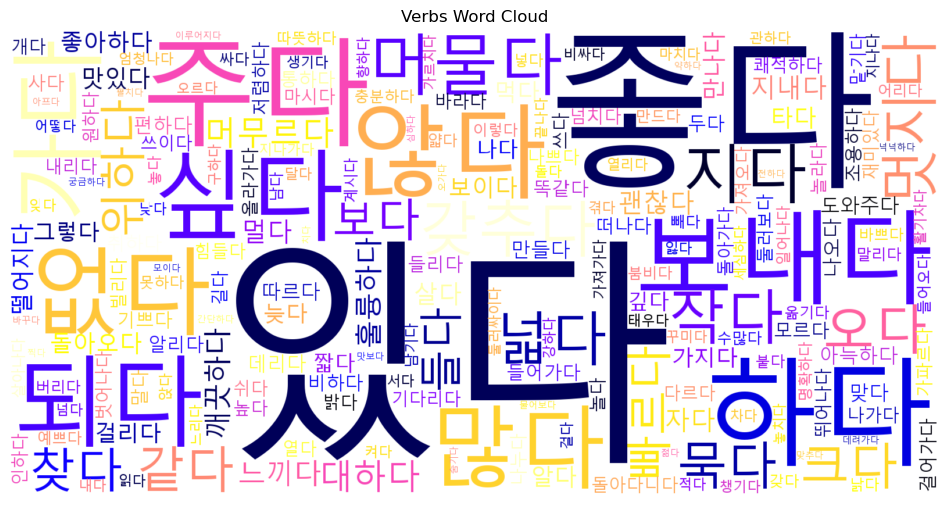

In [64]:
font_path = 'C:/Windows/Fonts/malgun.ttf'
generate_word_cloud(verbs_counts, font_path, 'Verbs Word Cloud', 'gnuplot2')

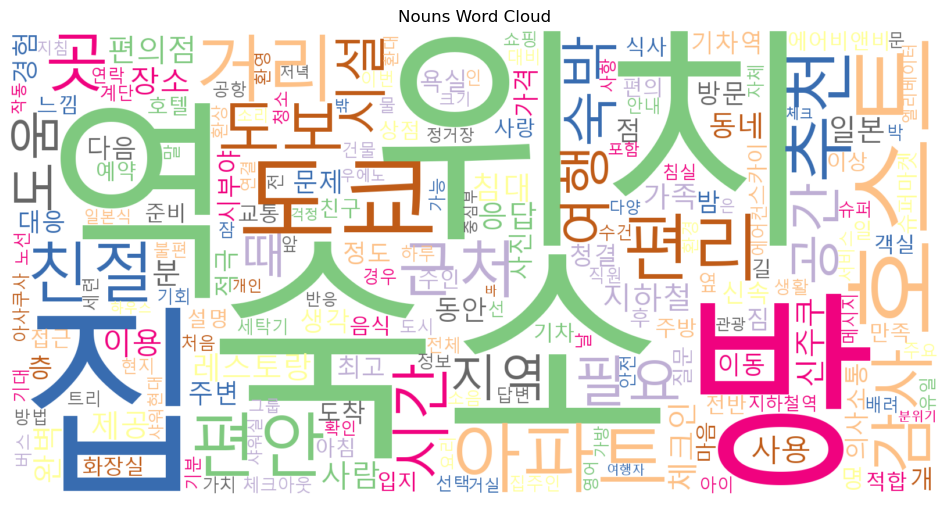

In [65]:
generate_word_cloud(nouns_counts, font_path, 'Nouns Word Cloud', 'Accent')


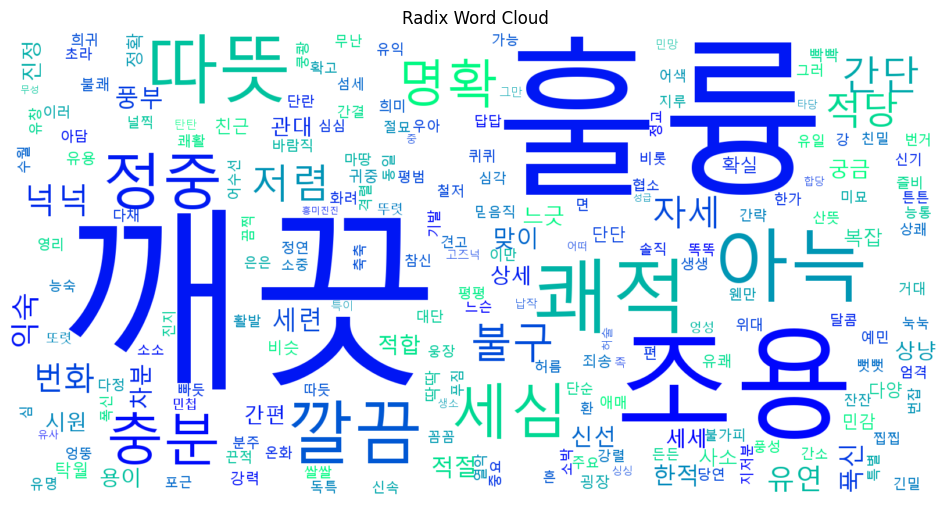

In [31]:
generate_word_cloud(radixs_counts, font_path, 'Radix Word Cloud', 'winter')


In [66]:
sorted_verbs = sorted(verbs_counts.items(), key=lambda x: x[1], reverse=True)
sorted_nouns = sorted(nouns_counts.items(), key=lambda x: x[1], reverse=True)
sorted_radixs = sorted(radixs_counts.items(), key=lambda x: x[1], reverse=True)


In [33]:

def generate_treemap(labels, values, title):
    fig = go.Figure(go.Treemap(
        labels=labels[:30],  # You can adjust the number of labels displayed
        parents=[''] * len(labels[:30]),
        values=values,
        texttemplate="%{label}<br>%{value}",
        hoverinfo='label+value',
    ))

    fig.update_layout(
        title=title,
        margin=dict(l=10, r=10, t=40, b=10),  # Adjust margins for better layout
    )

    fig.show()


label, counts = zip(*sorted_verbs)

generate_treemap(label, counts, 'Ingredient Frequency Treemap')


In [34]:
label, counts = zip(*sorted_nouns)

generate_treemap(label, counts, 'Ingredient Frequency Treemap')

In [35]:
label, counts = zip(*sorted_radixs)

generate_treemap(label, counts, 'Ingredient Frequency Treemap')

###  감성 사전 만들기

In [75]:
print(f'Verb 의 개수 : {len(sorted_verbs)}')
print(f'Noun 의 개수 : {len(sorted_nouns)}')
print(f'Radix 의 개수 : {len(sorted_radixs)}')  

Verb 의 개수 : 1716
Noun 의 개수 : 22019
Radix 의 개수 : 458


#### 어근을 변형해 부정, 긍정 문장을 생성하고 점수를 입력하는 코드  생성
- 임시적으로 부정어에는 마이너스 점수를 할당한다 
- 파일은 txt 형태이다 


In [76]:
def generate_variations(root_word):
    variations = []
    scores = []
    
    variations.append(root_word + "하게")
    scores.append(1)
    variations.append(root_word + "한")
    scores.append(1)
    variations.append(root_word + "하다")
    scores.append(2)
    variations.append(root_word + "하고")
    scores.append(2) 
    variations.append(root_word + "하며")
    scores.append(2)
    variations.append(root_word + "하지 않다")
    scores.append(-2)
    variations.append(root_word + "하지 않게")
    scores.append(-2)
    variations.append(root_word + "하지 않은")
    scores.append(-2)
    variations.append(root_word + "하지 않고")
    scores.append(-2)
    variations.append(root_word + "하지 않으며")
    scores.append(-2)
    variations.append(root_word + "안한")
    scores.append(-2)
    
    return variations, scores


In [77]:

def save_to_file(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for _, row in data.iterrows():
            file.write(f"{row['label']} {row['score']}\n")

def split_label_score(data, file_name, isRadix=False):
    word_list, _ = zip(*data)
    word_list = list(word_list)
    score_list = []

    if isRadix:
        new_word_list = []
        new_score_list = []
        for word in word_list:
            variations, scores = generate_variations(word)
            new_word_list.extend(variations)
            new_score_list.extend(scores)
        word_list = new_word_list
        score_list = new_score_list
    else:
        score_list = [0] * len(word_list)

    score_df = pd.DataFrame({
        'label': word_list,
        'score': score_list
    })

    file_path = f"{file_name}.txt"
    save_to_file(score_df, file_path)

    score_df.to_csv(f'{file_name}_sentiword_score.csv')

    
    
    return score_df


In [78]:
# save_to_file(nouns_list, 'nouns_list')
# save_to_file(verbs_list, 'verbs_list')
# save_to_file(radixs_list, 'radixs_list')

# file_path = 'radixs_list'
# with open(file_path, 'w', encoding='utf-8') as file:
#     for data in radixs_list:
#         file.write(f"{data}\n")


In [80]:
split_label_score(sorted_radixs, 'radix_raw', isRadix = True)

,label,score
0,깨끗하게,1
1,깨끗한,1
2,깨끗하다,2
3,깨끗하고,2
4,깨끗하며,2
...,...,...
5033,불길하지 않게,-2
5034,불길하지 않은,-2
5035,불길하지 않고,-2
5036,불길하지 않으며,-2


#### 긍정 단어와 부정 단어에 대한 점수 할당이 반대로 되어야하므로 나머지는 하드코딩하며 수정해준다

------
#### 반대로 할당 
- 딱딱 
- 불쾌
- 빡빡
- 엄격
- 번잡
- 예민
- 지저분
- 답답
- 끔찍
- 지루
- 어수선
- 심각 
- 심
- 흔
- 퀴퀴
- 분주
- 축축 
- 협소
- 빠듯
- 심심
- 눅눅
- 열악 
- 쌀쌀
- 허름
- 찝찝
- 끈적
- 쿵쾅
--------
#### 제거 & 애메 
- 면 -> 제거 
- 그러 ->제거
- 아담 -> 애매 
- 이러 -> 제거 
- 평범 -> 애매 
- 죄송 -> 제거 
- 번거 -> 제거 
- 간략/간소 -> 애매
- 엉뚱 -> 애매 

In [8]:
def text_file_to_dataframe(file_path):
    data = []
    line_number = 0  # 에러 발생한 줄 번호 추적
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line_number += 1
            try:
                if line:
                    parts = line.split()  # 공백으로 데이터를 분할
                    if len(parts) <= 3:
                        word = ' '.join(parts[:-1])
                        score = parts[-1]
                        data.append((word, int(score)))
                    else:
                        print(f"에러: 파일 {file_path}, 줄 {line_number} - 데이터 포맷이 잘못되었습니다.")
                        pass
            except Exception as e:
                print(f"에러: 파일 {file_path}, 줄 {line_number} - {str(e)}")

    df = pd.DataFrame(data, columns=['emoticon', 'sentiment_score'])
    return df




In [9]:
file_path = 'radix_fix.txt'
senti_score_df = text_file_to_dataframe(file_path)
senti_score_df.to_csv('radix_sentiment_data.csv')
senti_score_df

,emoticon,sentiment_score
0,깨끗하게,2
1,깨끗한,2
2,깨끗하다,2
3,깨끗하고,2
4,깨끗하며,2
...,...,...
4025,불길하지 않게,1
4026,불길하지 않은,1
4027,불길하지 않고,1
4028,불길하지 않으며,1


In [10]:
senti_score_df['sentiment_score'].unique()

array([ 2, -2,  1, -1, -3], dtype=int64)

In [17]:
airbnb_review_data['space_comment']= space_comments # 띄어쓰기 교정까지 완료된 코멘트 
airbnb_review_data.head()

,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating,reviewer_id,date,comments,kr_comments,space_comment
0,197677,964081.0,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1002142.0,2011-09-21,Couldnt get any betterThe apartment itself is ...,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다. 게다가 ...,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다 게다가 동...
1,197677,964081.0,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1031940.0,2011-10-14,The apartment is bigger than it looks in the p...,아파트는 사진에서 보이는 것보다 더 넓습니다. 커플에게 적합합니다. 깨끗하고 잘 관...,아파트는 사진에서 보이는 것보다 더 넓습니다 커플에게 적합합니다 깨끗하고 잘 관리되...
2,197677,964081.0,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1097040.0,2011-11-21,The appartement is perfect for a couple It is ...,아파트는 커플에게 적합합니다. 조금 작지만 정말 완벽한 가구가 그것을 보완합니다. ...,아파트는 커플에게 적합합니다 조금 작지만 정말 완벽한 가구가 그것을 보완합니다 일상...
3,197677,964081.0,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1183674.0,2011-11-30,We had a terrific stay at Yoshimi and Mareks l...,요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다. 모든 것이 새로 정...,요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다 모든 것이 새로 정리...
4,197677,964081.0,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1538004.0,2012-01-09,We loved our stay at the Oshiage Holiday Apart...,우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다. 아파트는 매우 좋았고 매...,우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다 아파트는 매우 좋았고 매우...


### 감성사전을 이용하여 점수 계산하기 

In [18]:

def calculate_sent_score(sentence, sentiment_dictionary):
    total = []

    for idx, s in tqdm(enumerate(sentence)):
      sent_score = 0
      for emotion in sentiment_dictionary:
        if emotion in s:
          sent_score += sentiment_dictionary[emotion]
      
      if len(s.split()) == 0:
        total.append(sent_score)
      else:
        total.append(sent_score/len(s.split())) # 점수가 범위가 좁아지는거 방지 
      
    return total

def process_sentiment_data(df, output_csv, sentiment_dictionary):
  #'words' 열에 대한 감정 점수 계산
  df['sentiment_score'] = calculate_sent_score(df['space_comment'], sentiment_dictionary)
  df.to_csv(output_csv, index=False)



In [20]:
output_csv = 'sentiment_score_to_space_comment.csv'

sentiment_dict = dict(zip(senti_score_df['emoticon'], senti_score_df['sentiment_score']))

process_sentiment_data(airbnb_review_data, output_csv, sentiment_dict)

In [3]:
sentiment_df = pd.read_csv('sentiment_score_to_space_comment.csv')
sentiment_df[['space_comment', 'sentiment_score']]

,space_comment,sentiment_score
0,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다 게다가 동...,0.051282
1,아파트는 사진에서 보이는 것보다 더 넓습니다 커플에게 적합합니다 깨끗하고 잘 관리되...,0.016129
2,아파트는 커플에게 적합합니다 조금 작지만 정말 완벽한 가구가 그것을 보완합니다 일상...,0.000000
3,요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다 모든 것이 새로 정리...,0.027778
4,우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다 아파트는 매우 좋았고 매우...,0.033898
...,...,...
184941,바로 밖에서 좋은 음식,0.000000
184942,집은 역에서 멀지 않고 근처에 레스토랑이 많습니다 체크인과 체크아웃이 매우 편리합니...,0.166667
184943,훌륭한 경험입니다 위치가 매우 편리합니다 호스트도 매우 친절합니다 가족 여행에 적합합니다,0.181818
184944,처음부터 끝까지 정중한 대응을 해 주셔서 이번 마지막 여행의 숙소로 결정해 대정해였...,0.078125


### 감성분석 시각화


####  각 점수 범위를 더 작은 간격으로 나누어 표현하기 이전 

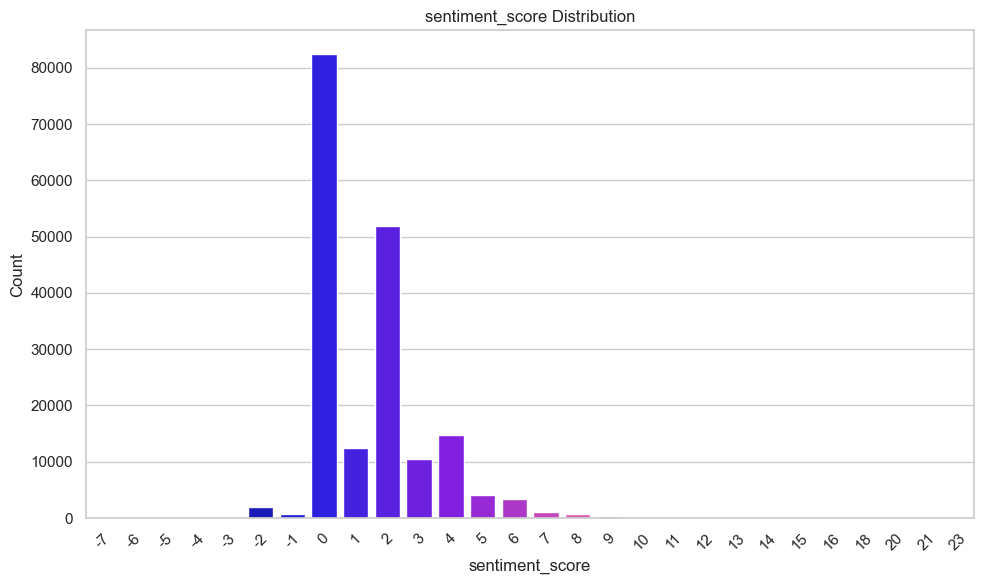

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    ax = sns.countplot(data=df, x=column_name, palette="gnuplot2")

    plt.xlabel(column_name)
    plt.ylabel('Count')

    plt.title(f'{column_name} Distribution')

    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(sentiment_df, 'sentiment_score')


In [200]:
def plot_sentiment_scatter(df, column_name):
    value_counts = df[column_name].value_counts().sort_index()
    x = value_counts.index
    y = value_counts.values
    
    # 컬러맵 생성
    colors = plt.cm.jet(np.linspace(0, 1, len(x)))
    
    plt.figure(figsize=(10, 6))
    
    # 산점도 그리기
    plt.scatter(x, y, c=colors, alpha=0.7)  # alpha는 점의 투명도 조절
    
    plt.xlabel(column_name)
    plt.ylabel('Count')
    
    plt.title(f'Sentiment Score Scatter Plot: {column_name}')
    
    # 컬러바 추가
    colorbar = plt.colorbar()
    colorbar.set_label('Sentiment Score')
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()


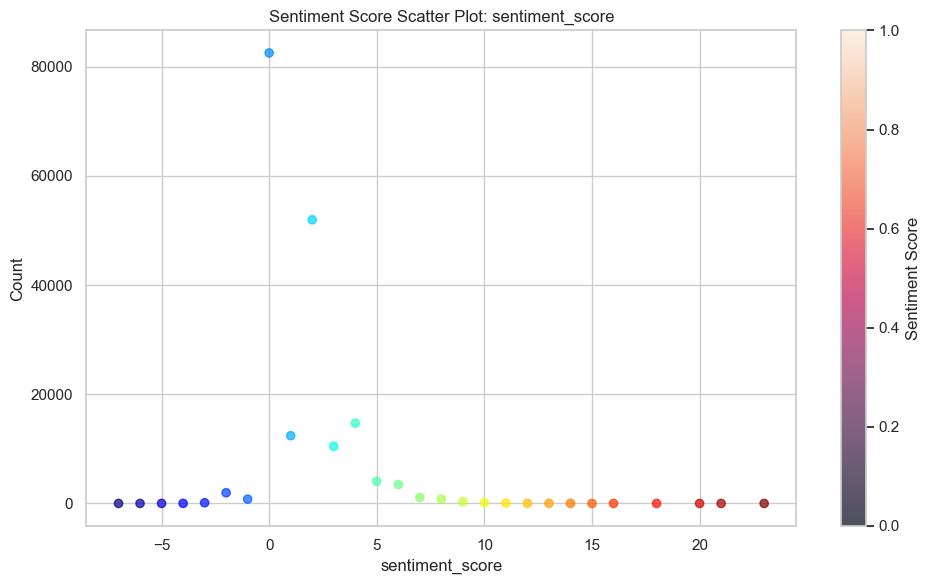

In [198]:
plot_sentiment_scatter(sentiment_df, 'sentiment_score')


In [228]:
minus_df = sentiment_df.loc[sentiment_df['sentiment_score']<0, ['space_comment', 'sentiment_score']]
minus_df = minus_df.sort_values(by = 'sentiment_score')
minus_df.reset_index(drop=True, inplace=True)
minus_df

,space_comment,sentiment_score
0,우리 대가 편안하게 잘 수 있는 넓고 편안한 집 바닥과 벽을 보호하기 위해 방에 무거운 여행가방이나 가방이 굴러다니는 일이 없습니다 과거에 값비싼 수리 비용을 초래한 주인의 끔찍한 경험에 대해 안타까움을 느꼈습니다 근처에 여러 버스 노선이 있습니다 숙소는 역 곳과 개인 기차역 곳으로 편리하게 데려다줬지만 버스가 자주 늦게 운행했습니다 머무는 동안 피자와 일본 국수 가게에서 배달을 주문했는데 매우 편리했습니다 일본에서는 쓰레기 수거가 매우 엄격하며 미타카는 같은 주인입니다 쓰레기 봉투를 제공해야 하지만 영어로 된 정보가 많지 않습니다 우리는 네 명의 아이들과 함께 집에 머물렀는데 작동하는 천 건조기가 없어서 힘들었습니다,-7
1,예약후 보내주시는 숙소설명서에 구체적인 약도와 일본어를 모르는 게스트를 배려한 여러가지 기계의 작동법을 미리 받아볼수 있어서 헤메는 일 없이 숙소까지 도착했습니다 건물은 약간 허름했고 생각보다 작은 규모였지만 여자 둘이 사용하기엔 불편함 없었습니다 쇼파 의 쿠션은 다 꺼져있었으나 숙소에서는 잠만 잤으므로 크게 불편함은 없었지만 여유로운 여행을 생각하시는 분에겐 큰 비중을 차지할듯 합니다 다용도실의 카페트는 청결이 의심되었습니다 방향제 냄세가 심해 머리가 아플지경이라 환기를 시켰고 방향제는 발코니로 내놓을수 밖에 없었습니다 수건의 섬유 유연제냄세또한 강해서 사용하면서 좀 찝찝한 느낌이 들었습니다 그렇다고 눈에 보이는 부분이 지저분한건 아니었으므로 오해는 없으시길 바랍니다 개인적으로 후각에 예민한 편입니다 위치적으론 좋았고 동네도 깔끔하고 좋았습니다 아수압이 심하게 약해사 마지막날 밤엔 숙소 근처 대중탕을 이용하여 씻었습니다,-6
2,위치는 어디에도 없습니다 지하철 호선과 수많은 레스토랑이 매우 가깝습니다 신주쿠역에서 도보로 분 거리에 스타벅스가 있습니다 방에 귀여운 계절 장식이 있는 편안한 침대가 있고 와 승무원은 매우 도움이 되고 의사소통이 잘 되었습니다 바쁜 도쿄 한복판에 있지만 밤에는 완전히 조용해서 잘 잤습니다 세탁기가 있어서 가볍게 여행할 수 있어서 좋았습니다 특히 화장실에서 퀴퀴한 냄새가 나서 조금 불쾌했습니다 전반적으로 좋았습니다 가치를 위한 자리,-5
3,저렴한 곳 확실히 도쿄에 싱글룸이 있는 것 같아요 숙소는 약간 지저분하고 지저분한 느낌이 들긴 하지만 괜찮습니다 또한 샤워 시설이 없다는 점에 유의하세요,-5
4,숙소는 괜찮지만 기대 이하입니다 또한 숙소와 숙소 매뉴얼에는 로그인 정보가 포함된 가 있다고 명시되어 있지만 실망스럽게도 체크인한 순간부터 전혀 작동하지 않았고 와 팀에 메시지를 보냈을 때 시도해 보라고 요청했습니다 포켓 가 작동하지 않았고 심지어는 작동하지 않아 좌절감을 느꼈습니다 모바일 데이터를 사용하여 그들과 통신해야 했습니다 이것은 두 번째 날까지 이어졌고 그들은 그 대가로 사무실에서 다른 포켓 를 수집하라고 지시한 해결책을 쫓았습니다 휴가 일정이 사무실이 아닌 다른 곳으로 계획되어 있었고 사무실이 어디에 있는지 전혀 모르기 때문에 답답합니다 가 작동하지 않기 때문에 이러한 불편함이 더 큽니다 그래서 포켓 를 내 집으로 보내달라고 요청했습니다 그 대신 아파트에 여러 번 메시지를 주고받은 후에 숙소에 가 있고 하루 로 제한되는 포켓 가 없다고 명시되어 있기 때문에 숙소 목록이 정확하지 않다고 말했습니다 그런 다음 그들은 실제로 숙소에 가 제공되지 않는다고 설명하고 말했습니다 오 웰어파트 문제로 인한 불쾌한 만남으로 인해 숙소의 침대는 꽤 편안했고 저와 가족은 잘 잘 수 있었습니다 아래층 베이커리에서는 도보로 분 이내에 다른 식당과 편의점과 함께 맛있는 페이스트리도 판매합니다 하지만 더 나은 위치가 있다고 말하고 싶습니다 가격 대비 가치가 높으며 근처의 하타가야 기차역도 주요 노선이 아닙니다,-5
...,...,...
2894,신바시역을 비롯 교통이 아주 좋았고 동네도 시끄럽지 않아 좋았습니다 수압도 환기도 양호하고 숙소 내에 다양한 편의시설도 잘 갖춰져 있어 편안한 시간을 보냈습니다,-1
2895,역에서 가까운 쇼핑에도 곤란하지 않습니다 게임 등 지루하게하지 않는 콘텐츠도 충실하고 최고입니다,-1
2896,골목 밖에 이자카야도 많고 근처에 음식점도 인기가 많아요 한식당을 가봤는데 아주 좋았습니다 집이 시나가와역에서 멀지 않고 걸어서 갈 수 있습니다 유일한 문제는 기둥이 많다는 것입니다 집 내부입니다 좀 뚱뚱해서 지나갈 수 없습니다 층은 너무 답답하고 길이 없습니다 환기가 잘 안 됩니다,-1
2897,호스트의 의사소통 능력이 큰 방해 요소입니다 그녀는 내가 누군가의 집에 처음으로 머물렀다는 느낌을 갖게 했고 나는 집 규칙을 매번 반복하지 않으면 그녀의 아파트를 해체하기 시작하고 위반할 경우 보상을 시작하는 버릇없는 녀석이었습니다 그 날은 이 경험 중 최악이었고 에어비앤비 경험 중 최악이었습니다 내가 본 것 중 가장 더러운 에어컨 필터입니다 에어컨이 방을 식히는 것 같지 않아서 어쩔 수 없이 발견했습니다 사진을 요청하세요 세탁기는 좋지만 세제는 없습니다 그것은 잘 갖춰진 그녀의 주방에 소금 후추가 있다는 사실에서 알 수 있듯이 논리와 맞지 않습니다 그렇지 않으면 아파트가 매우 좋습니다 호스트가 엄격한 유치원 교사와 같지 않았다면 필터에 대해 더 관대할 수 있었을 것이고 또 다른 작은 일은,-1


####  각 점수 범위를 더 작은 간격으로 나누어 표현